In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.datasets import load_boston
pd.set_option('display.max_columns', None)

In [211]:
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [212]:
df = pd.concat([df, pd.DataFrame(data.target, columns=["Price"])], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [213]:
# 506 rows & 13 columns
df.shape

(506, 14)

In [214]:
# There are no categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [215]:
df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [216]:
# checking for null values
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

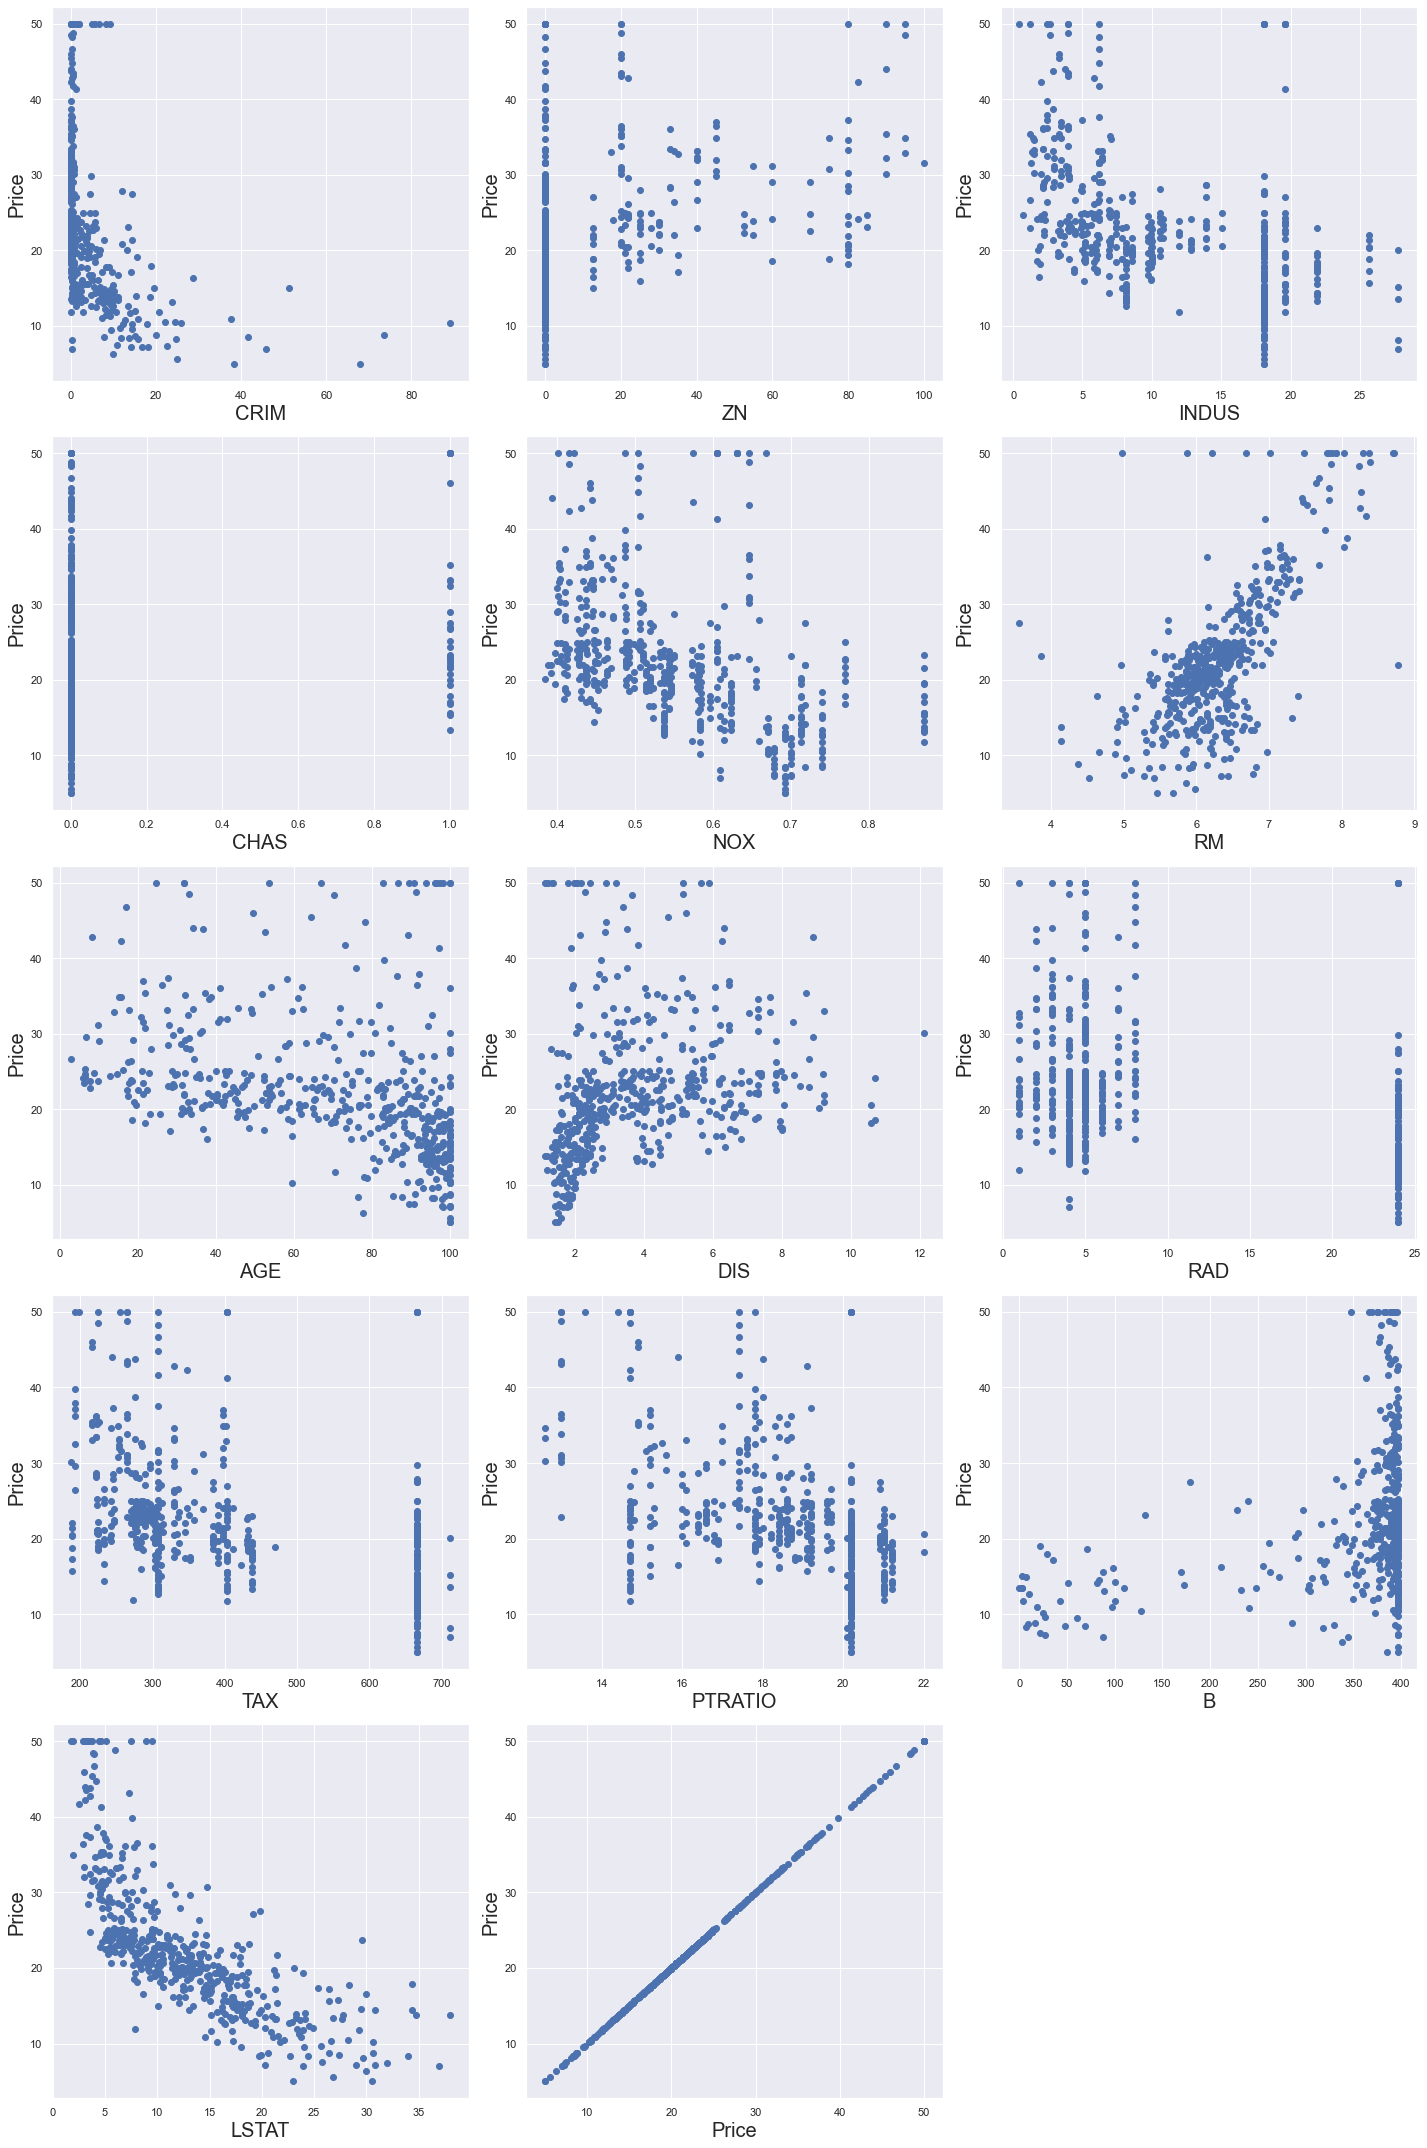

In [222]:
plt.figure(figsize=(20,30), facecolor="white")
plotnumber=1
for feature in df.columns:
    if plotnumber <=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[feature], df["Price"])
        plt.xlabel(feature, fontsize=20)
        plt.ylabel("Price", fontsize=20)
    plotnumber+= 1
plt.tight_layout()

In [223]:
# Lets see how many unique numerical values are there in each feature
u = [len(df[e].unique()) for e in df.columns]
pd.DataFrame(data=u, index=df.columns, columns=["Unique Values Count"])

,Unique Values Count
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [224]:
# Divide numerical variables in continous numerical variables and discrete numerical variables
discrete_numerical_variables = [feature for feature in df.columns if len(df[feature].unique()) < 25]
discrete_numerical_variables

['CHAS', 'RAD']

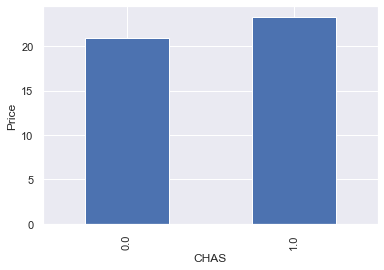

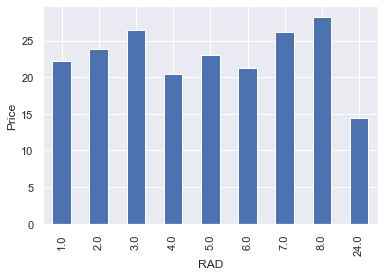

In [225]:
# visualizing the relationship of discrete variables and price
for e in discrete_numerical_variables:
    data = df.copy()
    data.groupby(e)["Price"].median().plot.bar()
    plt.ylabel("Price")
    plt.show()

In [226]:
continous_numerical_variable = [feature for feature in df.columns if feature not in discrete_numerical_variables]

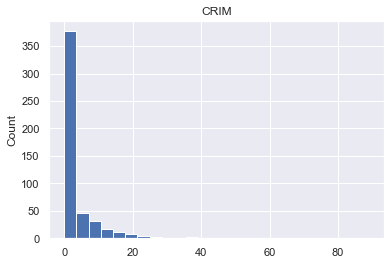

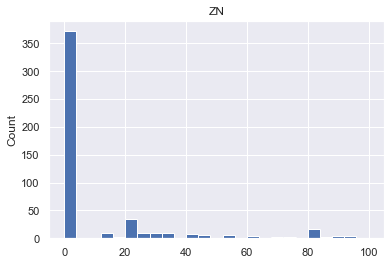

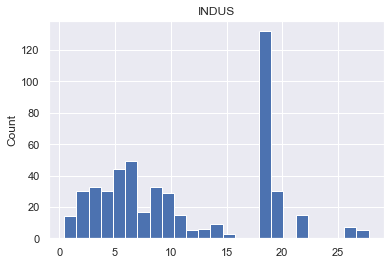

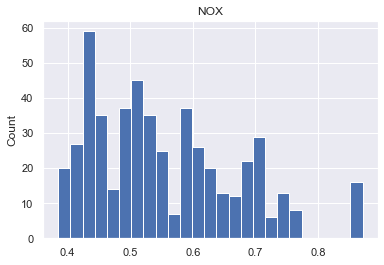

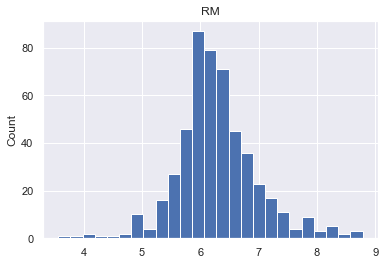

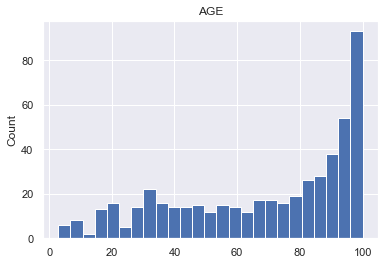

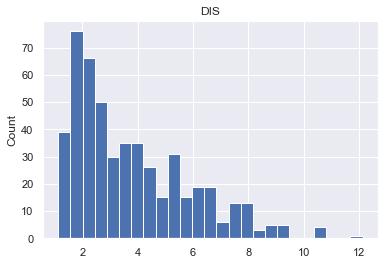

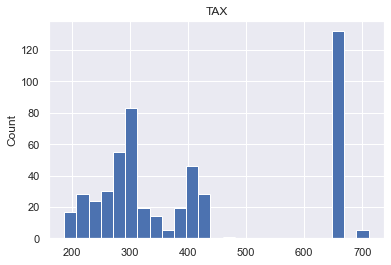

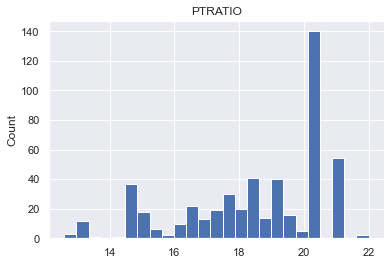

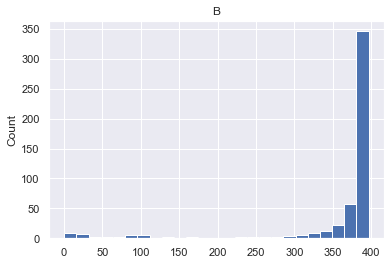

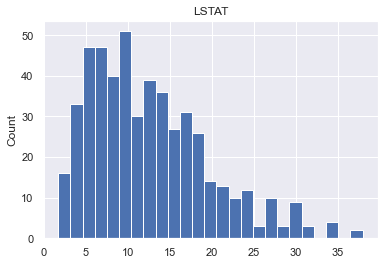

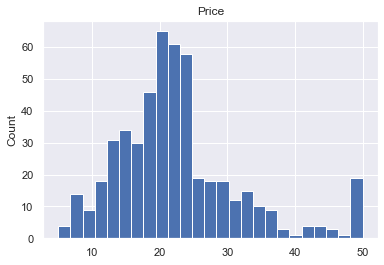

In [227]:
# Analyzing continous variabe distribution by making histograms
for e in continous_numerical_variable:
    data = df.copy()
    data[e].hist(bins=25)
    plt.ylabel("Count")
    plt.title(e)
    plt.show()

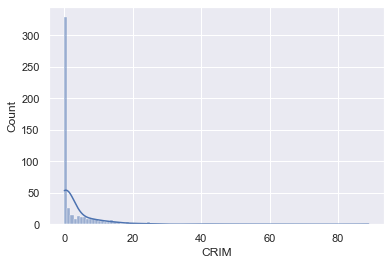

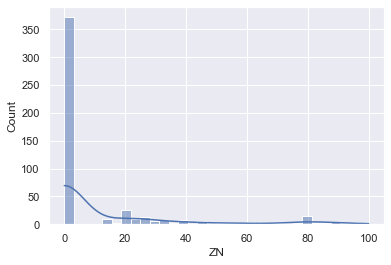

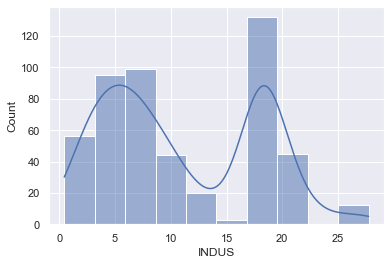

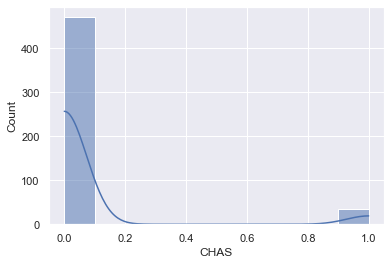

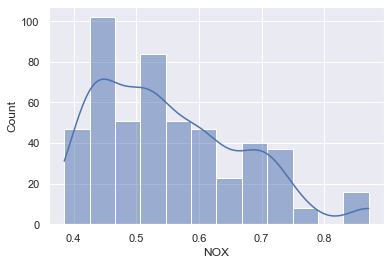

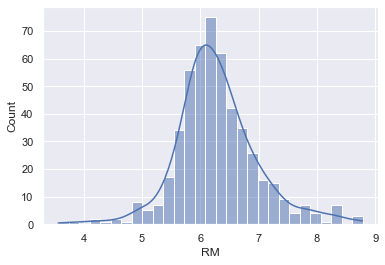

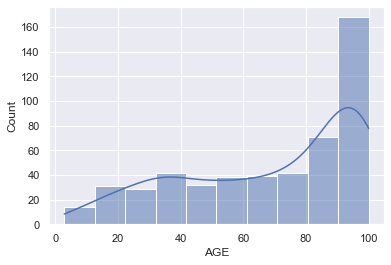

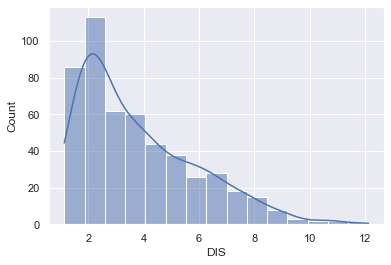

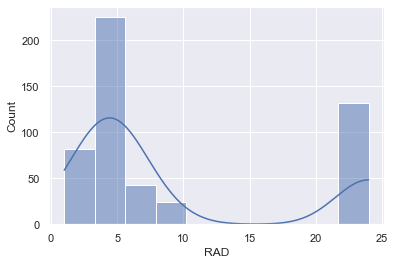

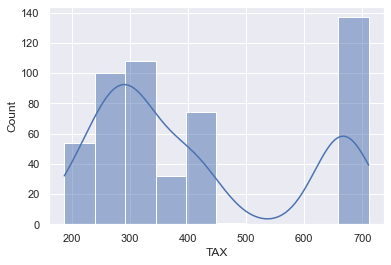

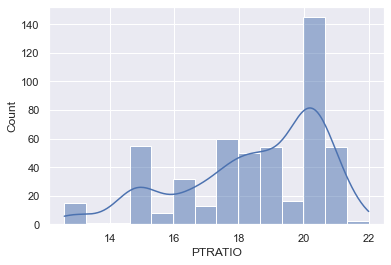

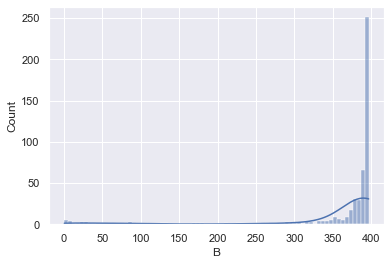

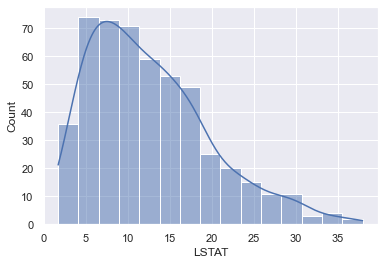

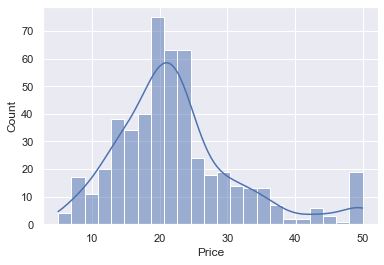

In [228]:
for e in df.columns:
    sns.histplot(df[e], kde=True)
    plt.show()

C:\Users\DELL\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


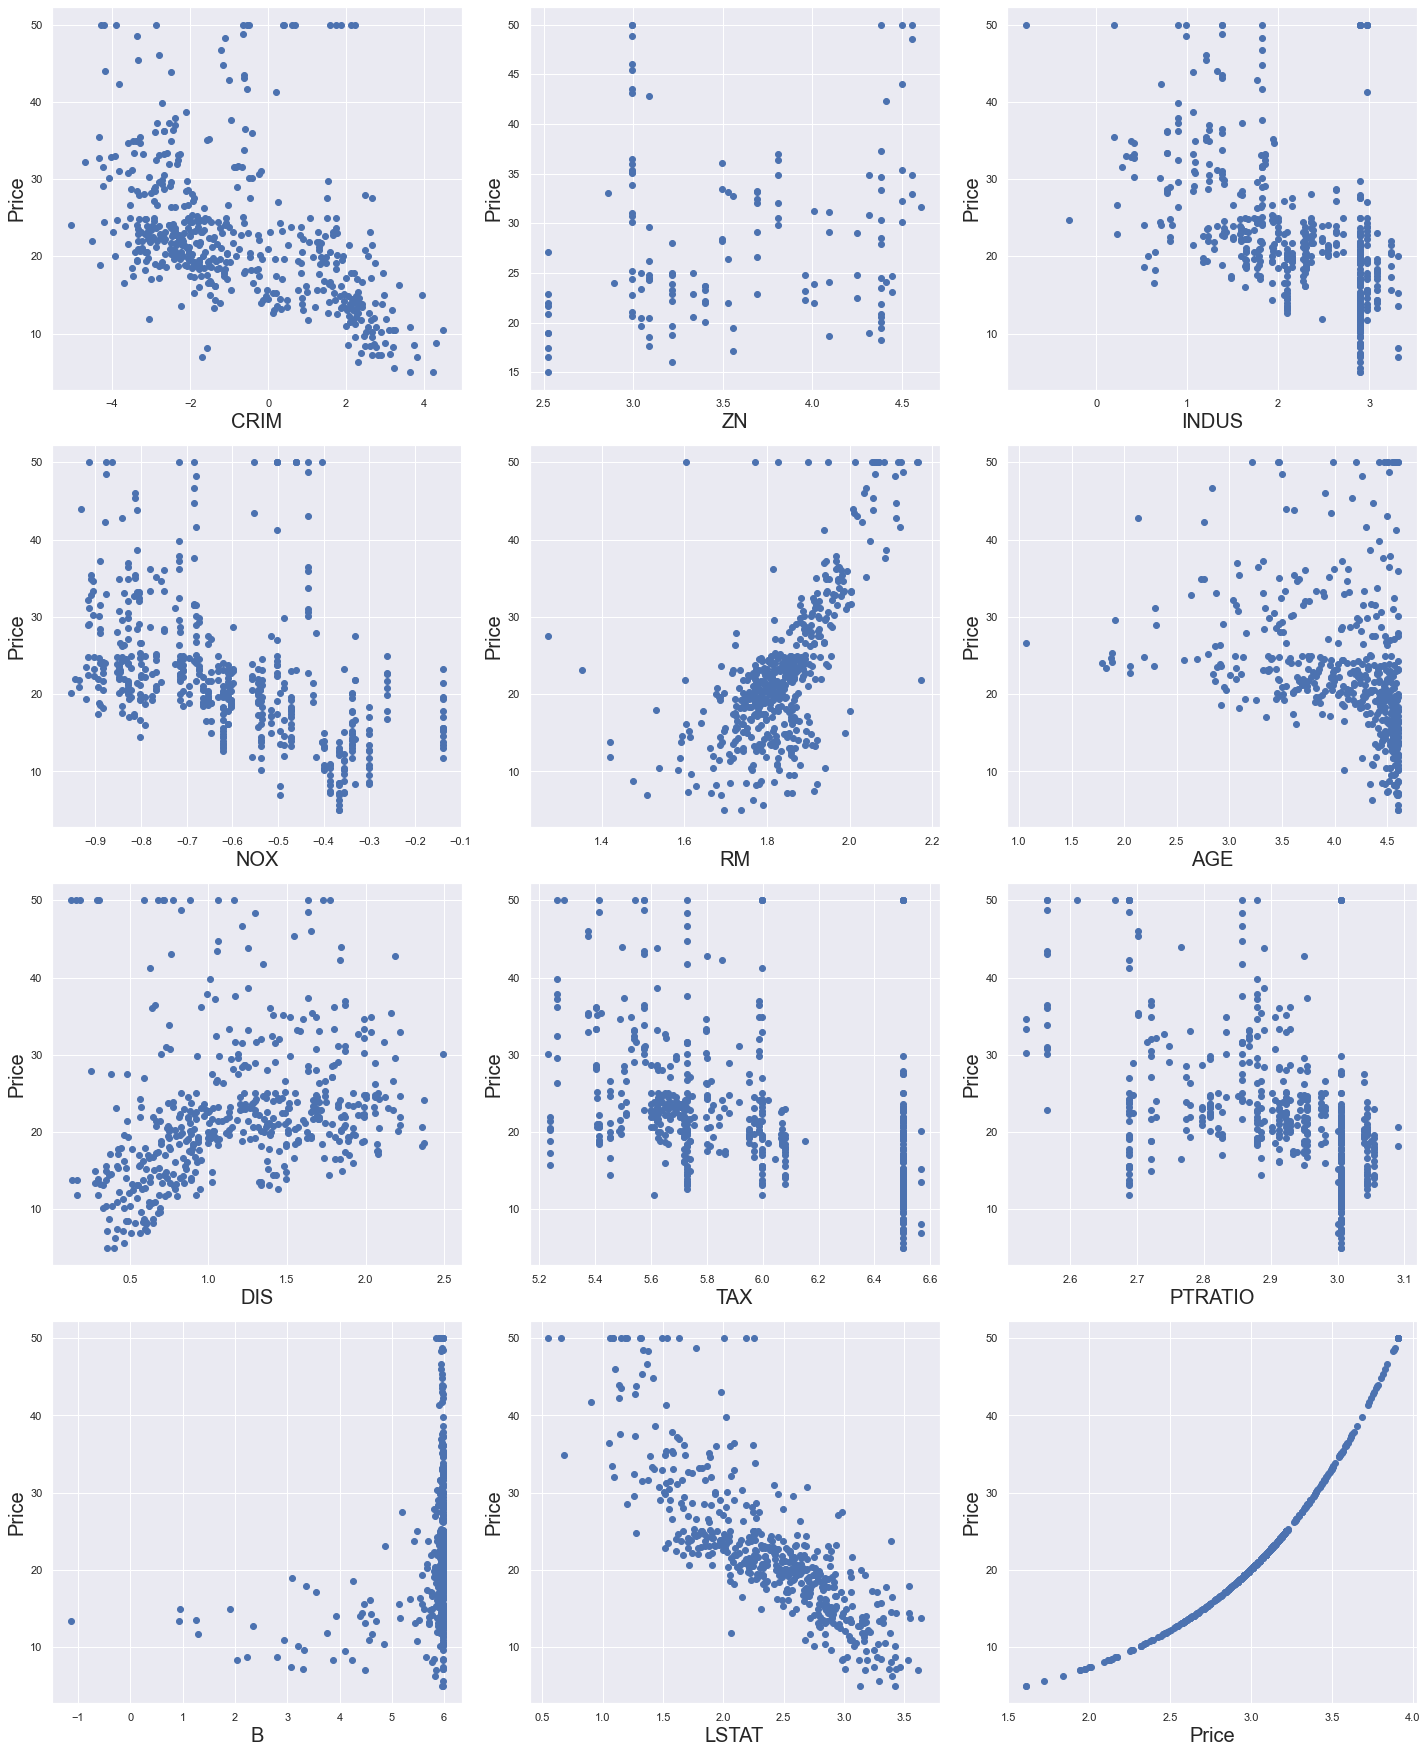

In [229]:
# Lets see how logarithmatic transformation affects 
plt.figure(figsize=(20,30), facecolor="white")
plotnumber=1
for feature in continous_numerical_variable:
    if plotnumber <=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(np.log(data[feature]), data["Price"])
        plt.xlabel(feature, fontsize=20)
        plt.ylabel("Price", fontsize=20)
    plotnumber+= 1
plt.tight_layout()

In [230]:
# After applying log transformation we can see that many data points came close forming nearly linear relation

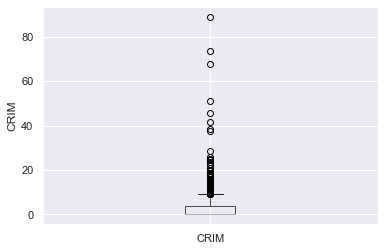

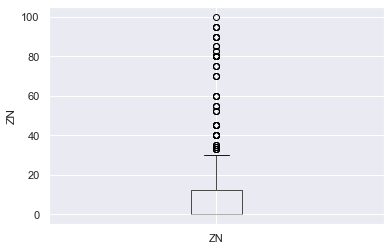

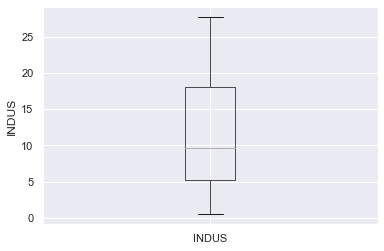

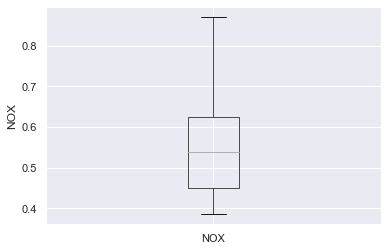

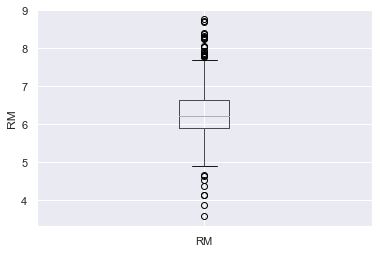

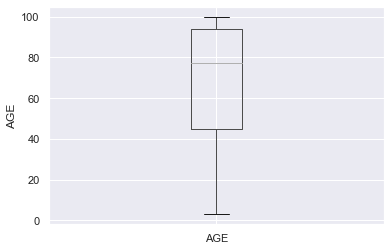

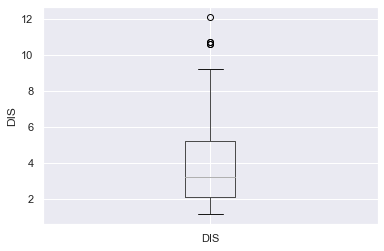

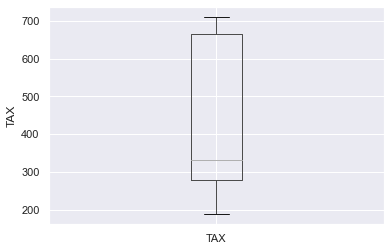

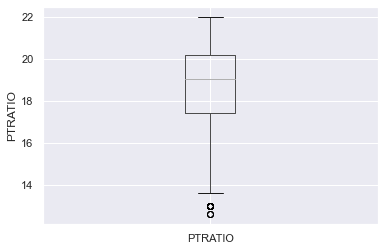

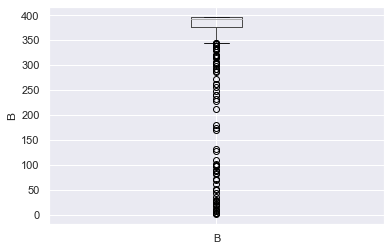

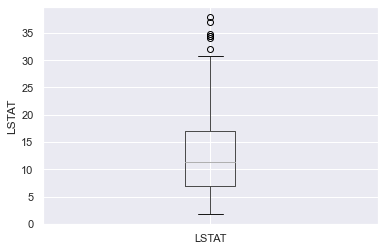

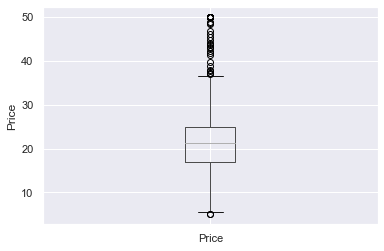

In [231]:
# check for outliers
for e in continous_numerical_variable:
    data = df.copy()
    data.boxplot(column=e)
    plt.ylabel(e)
    plt.show()

In [232]:
# CRIM, ZN, RN, DIS, PTRatio, B, LSTAT - have outliers
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3-q1
    v_col = v[(v<= q1-1.5*irq) | (v>= q3+1.5*irq)]
    perc = np.shape(v_col)[0]*100.0 / np.shape(data)[0]
    print("{} has {} % outliers".format(k,np.round(perc,2)))
    

CRIM has 13.04 % outliers
ZN has 13.44 % outliers
INDUS has 0.0 % outliers
CHAS has 100.0 % outliers
NOX has 0.0 % outliers
RM has 5.93 % outliers
AGE has 0.0 % outliers
DIS has 0.99 % outliers
RAD has 0.0 % outliers
TAX has 0.0 % outliers
PTRATIO has 2.96 % outliers
B has 15.22 % outliers
LSTAT has 1.38 % outliers
Price has 7.91 % outliers


<AxesSubplot:ylabel='Density'>

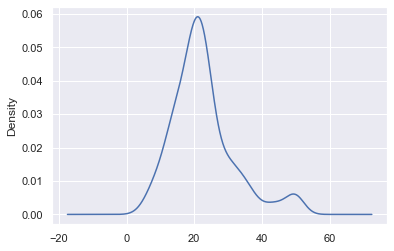

In [233]:
df["Price"].plot.kde()

In [234]:
# Remove the outliers of price whose value if above 50
df = df[~(df["Price"] >= 50.0)]

<AxesSubplot:>

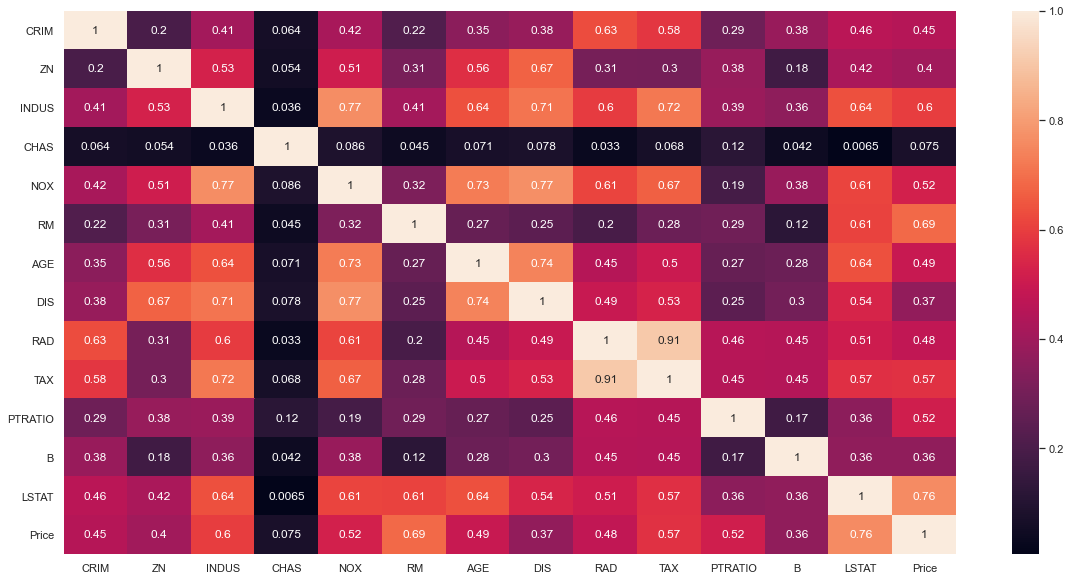

In [235]:
# Checking correlations through heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

In [236]:
# Here we can see that, TAX and RAD is highly correlated ~ 0.91
# LSTAT,PTRatio,RM,TAX,INDUS,NOX, These columns are high correlated with Price, they can be used as identifiers

In [237]:
feature_cols = ["INDUS", "NOX", "RM", "TAX", "PTRATIO","LSTAT"]

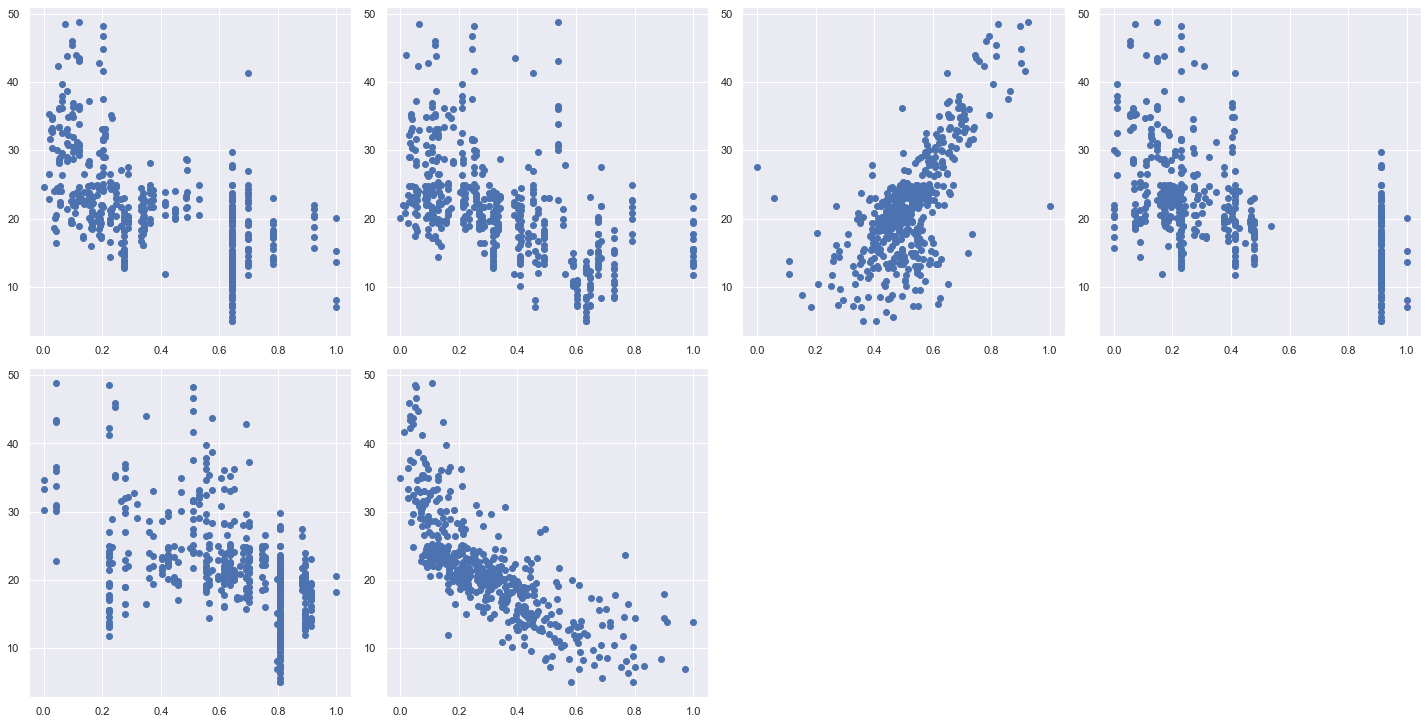

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df[feature_cols]
y = df["Price"]
x = pd.DataFrame(data=scaler.fit_transform(x), columns=feature_cols)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
axs = axs.flatten()
for feature in x.columns:
    if plotnumber<=16 :
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(x[feature], y)
    plotnumber+=1
plt.tight_layout()

In [254]:
# We can remove skewness using log transformation
y = np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [256]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
x_scaled = scaler.fit_transform(x)

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20, random_state=255)

In [278]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [300]:
def adj_r2(x,y):
    r2 = lin_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print(adj_r2(x_train,y_train))
print(adj_r2(x_test,y_test))

0.732662762698721
0.7801944540941526


In [301]:
r2 = [lin_reg.score(x_train,y_train), lin_reg.score(x_test, y_test)]
adj_r2 = [adj_r2(x_train,y_train), adj_r2(x_test,y_test)]
pd.DataFrame(data=[r2,adj_r2], columns=["Training Data", "Testing"], index=["R2", "Adj-R2"])

,Training Data,Testing
R2,0.736765,0.793791
Adj-R2,0.732663,0.780194


In [302]:
# there is not much difference of scores between training and testing data

In [303]:
# Using Lasso Regularization
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)
alpha = lasscv.alpha_
alpha

1.5282660597855667e-05

In [304]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1.5282660597855667e-05)

In [305]:
lasso_reg.score(x_test,y_test)

0.7937726157693344

In [306]:
# Our score is same even if we use the regularization, we can say that the model is not overfitted

In [307]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.5140604752417732

In [308]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.5140604752417732)

In [310]:
ridge_model.score(x_test, y_test)

0.7909382862326337

In [311]:
# In ridge also, we got nearly the same score, hence we can say that the model is not overfitted

In [312]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)
elasticCV.alpha_

0.0005711398455711863

In [314]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test, y_test)

0.7926105184450869

### Thus in all the regularization techniques we got same score, we can say that our model is not overfitted